In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [12]:
df = pd.read_csv('/Users/alokranjansingh/Desktop/uidaiiiii/migra-view-uidai/data/processed/processed_aadhaar_data.csv')

In [13]:
# 1. Feature Engineering: Update Intensity Index (UII)
# Higher UII = High in-migration or demographic shifts in that pincode 
df['total_updates'] = df['demo_age_5_17'] + df['demo_age_17_'] + df['bio_age_5_17'] + df['bio_age_17_']
df['total_enrolment'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']
df['UII'] = df['total_updates'] / (df['total_enrolment'] + 1) # Avoid division by zero



In [14]:
# 2. Identify Top 10 Migration Hotspots by District
migration_hotspots = df.groupby('district')['UII'].mean().sort_values(ascending=False).head(10)
print("Top Migration Hotspots:\n", migration_hotspots)



Top Migration Hotspots:
 district
North East Delhi    382.470307
North Delhi         275.334987
Narayanpur          248.630236
Mahasamund          234.260944
North West Delhi    233.180340
Kawardha            197.024344
East Delhi          168.868931
West Delhi          166.088930
Rajnandgaon         165.409703
Kishanganj          161.416803
Name: UII, dtype: float64


In [ ]:
# 3. Visualize Trend: Updates over time across states

## 1. Convert to month period
df['month_period'] = pd.to_datetime(df['date']).dt.to_period('M')


## 2. FIX: Convert Period back to Timestamp for Seaborn compatibility
df['month'] = df['month_period'].dt.to_timestamp()



In [ ]:
# Perform state name standardization
df['state'] = (
    df['state']
    .str.strip()           # remove leading/trailing spaces
    .str.title()           # Andaman & Nicobar → Andaman & Nicobar
    .str.replace(r'\s+', ' ', regex=True)  # Fix double spaces
)
# only these states are valid
valid_states = [
    "Andaman & Nicobar Islands","Andhra Pradesh","Arunachal Pradesh","Assam","Bihar",
    "Chandigarh","Chhattisgarh","Dadra & Nagar Haveli And Daman And Diu","Delhi",
    "Goa","Gujarat","Haryana","Himachal Pradesh","Jammu And Kashmir","Jharkhand",
    "Karnataka","Kerala","Ladakh","Lakshadweep","Madhya Pradesh","Maharashtra",
    "Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Puducherry","Punjab",
    "Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura","Uttar Pradesh",
    "Uttarakhand","West Bengal"
]

df = df[df['state'].isin(valid_states)]
valid_states = [
    "Andaman & Nicobar Islands","Andhra Pradesh","Arunachal Pradesh","Assam","Bihar",
    "Chandigarh","Chhattisgarh","Dadra & Nagar Haveli And Daman And Diu","Delhi",
    "Goa","Gujarat","Haryana","Himachal Pradesh","Jammu And Kashmir","Jharkhand",
    "Karnataka","Kerala","Ladakh","Lakshadweep","Madhya Pradesh","Maharashtra",
    "Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Puducherry","Punjab",
    "Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura","Uttar Pradesh",
    "Uttarakhand","West Bengal"
]

df = df[df['state'].isin(valid_states)]


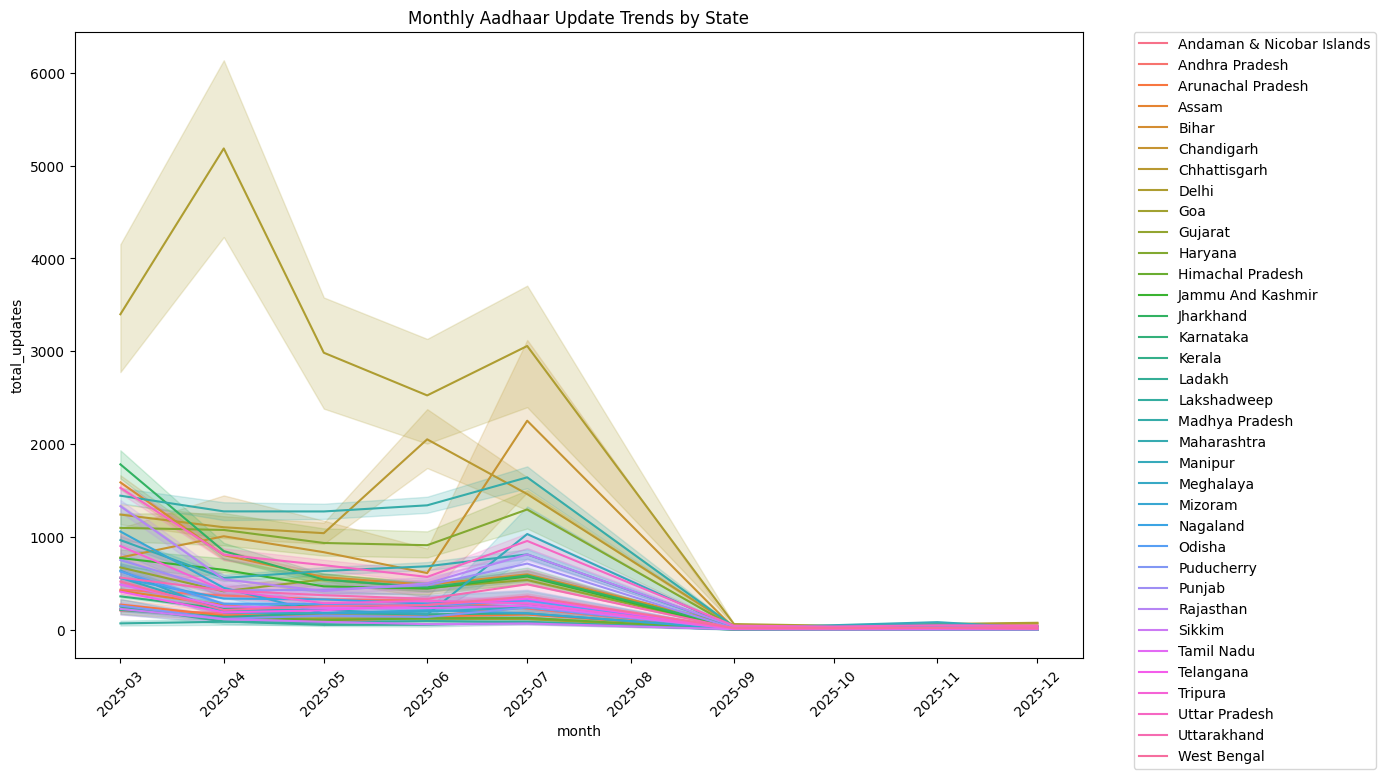

In [20]:
plt.figure(figsize=(14, 8))

sns.lineplot(data=df, x='month', y='total_updates', hue='state')

plt.title("Monthly Aadhaar Update Trends by State")
plt.xticks(rotation=45)

# Move legend outside
plt.legend(
    bbox_to_anchor=(1.05, 1),  # Position legend outside right
    loc='upper left',
    borderaxespad=0.
)

plt.tight_layout()
plt.show()


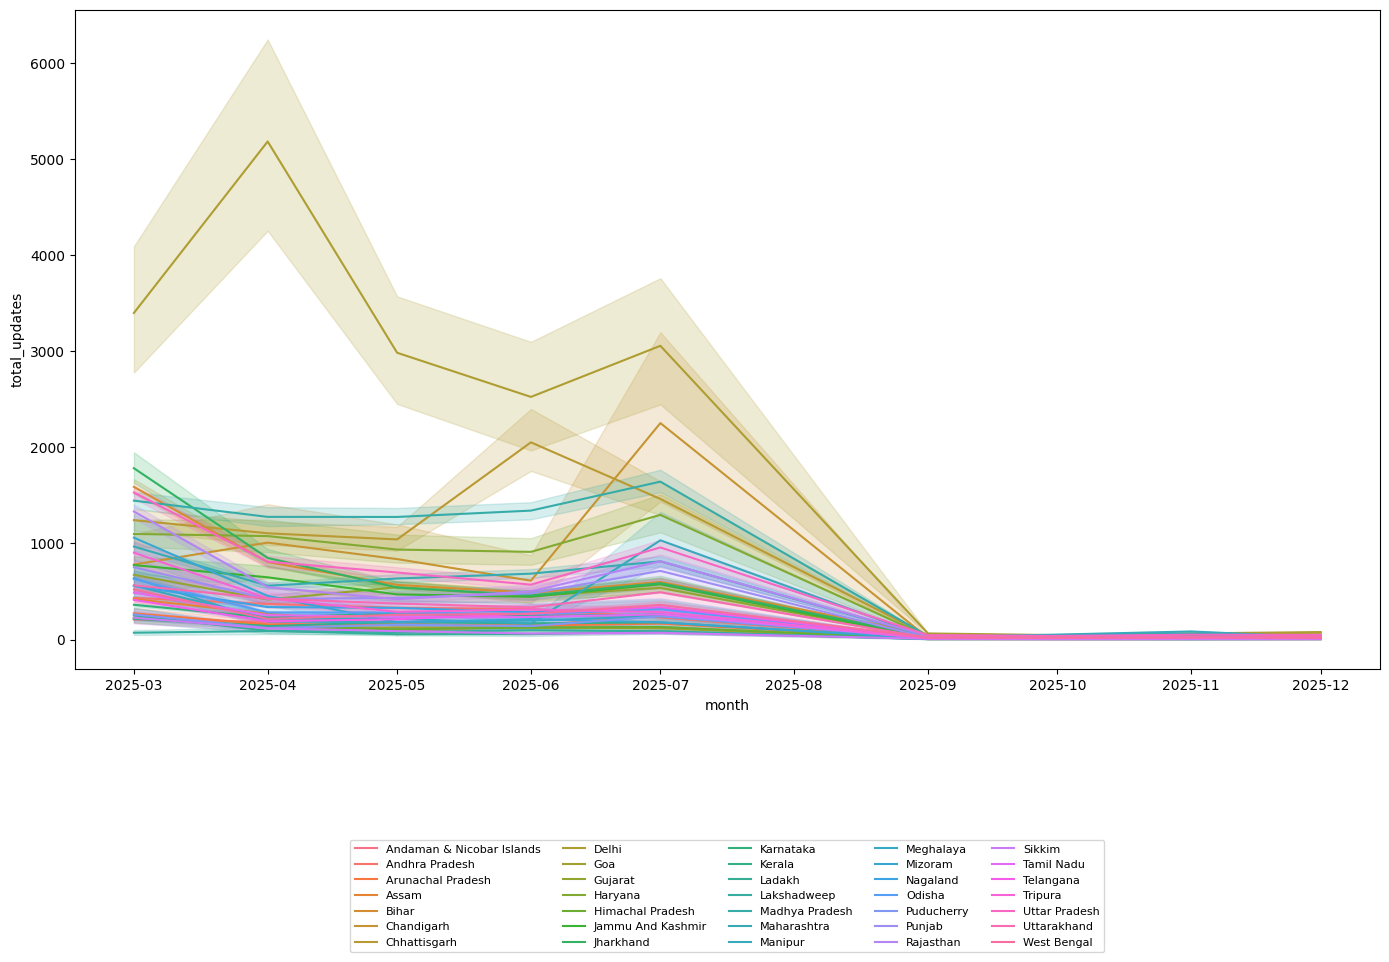

In [26]:
plt.figure(figsize=(14, 10))

sns.lineplot(data=df, x='month', y='total_updates', hue='state')

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.25),
    ncol=5,   # number of columns in legend
    fontsize=8
)

plt.tight_layout()
plt.show()


In [ ]:
# Top 10 states
top_states = (
    df.groupby('state')['total_updates']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

df_top = df[df['state'].isin(top_states)]


(array([20148., 20179., 20209., 20240., 20270., 20301., 20332., 20362.,
        20393., 20423.]),
 [Text(20148.0, 0, '2025-03'),
  Text(20179.0, 0, '2025-04'),
  Text(20209.0, 0, '2025-05'),
  Text(20240.0, 0, '2025-06'),
  Text(20270.0, 0, '2025-07'),
  Text(20301.0, 0, '2025-08'),
  Text(20332.0, 0, '2025-09'),
  Text(20362.0, 0, '2025-10'),
  Text(20393.0, 0, '2025-11'),
  Text(20423.0, 0, '2025-12')])

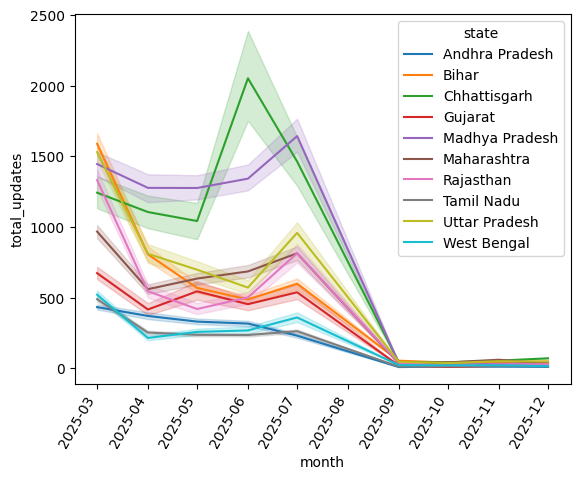

In [25]:
sns.lineplot(data=df_top, x='month', y='total_updates', hue='state')
plt.xticks(rotation=60, ha='right')

